In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#IMPORTING LIBRARIES

In [ ]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

#IMPORTING IMAGES FROM GDRIVE

In [ ]:
train_dir = '/content/drive/MyDrive/TRAIN'
test_dir = '/content/drive/MyDrive/TEST'

In [ ]:
train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+'/'+label):
        train_paths.append(train_dir+'/'+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

#DISTRIBUTION OF CLASSES IN DATASET

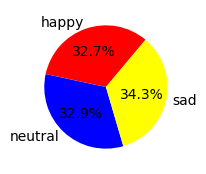

In [ ]:
plt.figure(figsize=(3,2))
colors = ['red','blue','yellow']
plt.rcParams.update({'font.size': 10})
plt.pie([len([x for x in train_labels if x=='happy']),
         len([x for x in train_labels if x=='neutral']),
         len([x for x in train_labels if x=='sad'])],
        labels=['happy','neutral','sad'],
        colors=colors, autopct='%.1f%%', explode=(0.001,0.001,0.001),
        startangle=50);

#labels

In [ ]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+'/'+label):
        test_paths.append(test_dir+'/'+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

#IMAGE PREPROCESSING

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.75,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.75,1.2))
    image = np.array(image)/255.0
    return image

#GIVEN A LIST OF IMAGES,THIS FUNCTION RETURNS ARRAY OF IMAGES

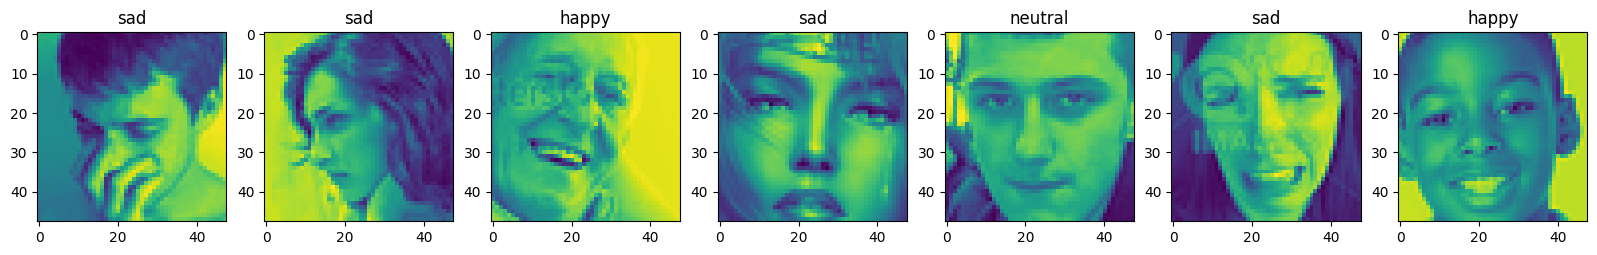

In [ ]:
IMAGE_SIZE = 64
fig, axes = plt.subplots(1, min(7, len(train_labels)), figsize=(20, 8))
for i in range(len(axes)):
    if i < len(train_labels):
        image_path = train_paths[i]
        axes[i].imshow(plt.imread(image_path))
        axes[i].set_title(train_labels[i])
    else:
        axes[i].axis('off')
plt.show()

#DATAGEN DEFINITION

In [ ]:
unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

In [ ]:
def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

In [ ]:
unique_labels = ['happy', 'neutral', 'sad']

def decode_label(labels):
    decoded = []
    for x in labels:
        if x >= 0 and x < len(unique_labels):
            decoded.append(unique_labels[x])
        else:
            decoded.append('Unknown')
    return np.array(decoded)

#Model building

In [ ]:
custom_model=Sequential()

conv1=custom_model.add(Conv2D(32,(3,3),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(BatchNormalization())
conv1=custom_model.add(Conv2D(32,(3,3),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(BatchNormalization())
conv1=custom_model.add(Conv2D(32,(3,3),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(BatchNormalization())
custom_model.add(Flatten())
custom_model.add(Dense(units=128,activation='relu'))
custom_model.add(Dense(units=4,activation='softmax'))

custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

#SGD WITHOUT DROPOUTS

In [ ]:
custom_model.compile(optimizer=SGD(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 6s 111ms/step - loss: 1.9755 - sparse_categorical_accuracy: 0.2560
Epoch 2/20
50/50 [==============================] - 4s 81ms/step - loss: 1.8467 - sparse_categorical_accuracy: 0.3030
Epoch 3/20
50/50 [==============================] - 5s 107ms/step - loss: 1.7206 - sparse_categorical_accuracy: 0.3280
Epoch 4/20
50/50 [==============================] - 4s 83ms/step - loss: 1.6581 - sparse_categorical_accuracy: 0.3150
Epoch 5/20
50/50 [==============================] - 4s 82ms/step - loss: 1.5943 - sparse_categorical_accuracy: 0.3235
Epoch 6/20
50/50 [==============================] - 5s 107ms/step - loss: 1.5956 - sparse_categorical_accuracy: 0.3210
Epoch 7/20
50/50 [==============================] - 4s 82ms/step - loss: 1.5375 - sparse_categorical_accuracy: 0.3270
Epoch 8/20
50/50 [==============================] - 4s 90ms/step - loss: 1.4879 - sparse_categorical_accuracy: 0.3630
Epoch 9/20
50/50 [==============================] - 5

<Axes: >

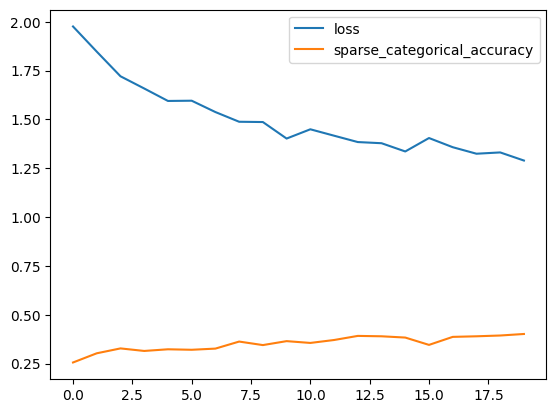

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 100ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     Unknown       0.00      0.00      0.00         0
       happy       0.45      0.45      0.45       261
     neutral       0.36      0.40      0.38       251
         sad       0.34      0.28      0.31       251

    accuracy                           0.38       763
   macro avg       0.29      0.28      0.28       763
weighted avg       0.38      0.38      0.38       763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 26ms/step - loss: 1.3568 - sparse_categorical_accuracy: 0.3696
test loss: 1.3568470478057861
test acc: 0.36959370970726013


#ADADELTA WITHOUT DROPOUTS

In [ ]:
custom_model.compile(optimizer=Adadelta(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 10s 156ms/step - loss: 1.3372 - sparse_categorical_accuracy: 0.3610
Epoch 2/20
50/50 [==============================] - 9s 175ms/step - loss: 1.3433 - sparse_categorical_accuracy: 0.3580
Epoch 3/20
50/50 [==============================] - 7s 145ms/step - loss: 1.3463 - sparse_categorical_accuracy: 0.3520
Epoch 4/20
50/50 [==============================] - 9s 181ms/step - loss: 1.3275 - sparse_categorical_accuracy: 0.3620
Epoch 5/20
50/50 [==============================] - 7s 133ms/step - loss: 1.3499 - sparse_categorical_accuracy: 0.3510
Epoch 6/20
50/50 [==============================] - 9s 179ms/step - loss: 1.3466 - sparse_categorical_accuracy: 0.3600
Epoch 7/20
50/50 [==============================] - 7s 135ms/step - loss: 1.3428 - sparse_categorical_accuracy: 0.3820
Epoch 8/20
50/50 [==============================] - 9s 182ms/step - loss: 1.3367 - sparse_categorical_accuracy: 0.3420
Epoch 9/20
50/50 [=============================

<Axes: >

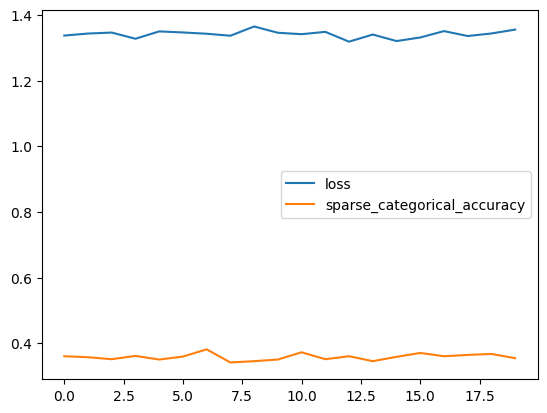

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 172ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     Unknown       0.00      0.00      0.00         0
       happy       0.42      0.39      0.41       261
     neutral       0.33      0.33      0.33       251
         sad       0.36      0.33      0.34       251

    accuracy                           0.35       763
   macro avg       0.28      0.26      0.27       763
weighted avg       0.37      0.35      0.36       763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 3s 103ms/step - loss: 1.3352 - sparse_categorical_accuracy: 0.3657
test loss: 1.3352166414260864
test acc: 0.3656618595123291


#RMSPROP WITHOUT DROPOUTS

In [ ]:
from keras.optimizers import RMSprop
custom_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 20s 332ms/step - loss: 1.4567 - sparse_categorical_accuracy: 0.4190
Epoch 2/20
50/50 [==============================] - 19s 374ms/step - loss: 1.1676 - sparse_categorical_accuracy: 0.4700
Epoch 3/20
50/50 [==============================] - 15s 302ms/step - loss: 1.0884 - sparse_categorical_accuracy: 0.5010
Epoch 4/20
50/50 [==============================] - 10s 204ms/step - loss: 1.0488 - sparse_categorical_accuracy: 0.5170
Epoch 5/20
50/50 [==============================] - 9s 178ms/step - loss: 0.9766 - sparse_categorical_accuracy: 0.5300
Epoch 6/20
50/50 [==============================] - 7s 136ms/step - loss: 0.9540 - sparse_categorical_accuracy: 0.5670
Epoch 7/20
50/50 [==============================] - 9s 178ms/step - loss: 0.8618 - sparse_categorical_accuracy: 0.5960
Epoch 8/20
50/50 [==============================] - 7s 132ms/step - loss: 0.8002 - sparse_categorical_accuracy: 0.6360
Epoch 9/20
50/50 [==========================

<Axes: >

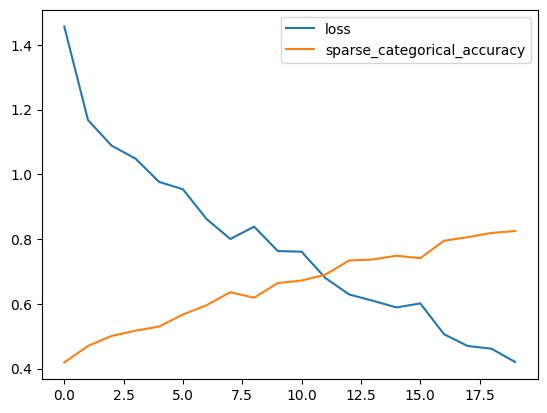

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 147ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.87      0.74      0.80       261
     neutral       0.67      0.69      0.68       251
         sad       0.66      0.74      0.69       251

    accuracy                           0.72       763
   macro avg       0.73      0.72      0.72       763
weighted avg       0.73      0.72      0.73       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 41ms/step - loss: 0.6493 - sparse_categorical_accuracy: 0.7366
test loss: 0.6492897868156433
test acc: 0.7365661859512329


#ADAGRAD WITHOUT DROPOUTS

In [ ]:
custom_model.compile(optimizer=Adagrad(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 17s 319ms/step - loss: 0.4953 - sparse_categorical_accuracy: 0.8080
Epoch 2/20
50/50 [==============================] - 17s 342ms/step - loss: 0.4585 - sparse_categorical_accuracy: 0.8130
Epoch 3/20
50/50 [==============================] - 17s 337ms/step - loss: 0.3702 - sparse_categorical_accuracy: 0.8680
Epoch 4/20
50/50 [==============================] - 16s 319ms/step - loss: 0.3227 - sparse_categorical_accuracy: 0.8900
Epoch 5/20
50/50 [==============================] - 12s 242ms/step - loss: 0.2021 - sparse_categorical_accuracy: 0.9481
Epoch 6/20
50/50 [==============================] - 9s 180ms/step - loss: 0.4607 - sparse_categorical_accuracy: 0.8190
Epoch 7/20
50/50 [==============================] - 7s 133ms/step - loss: 0.4326 - sparse_categorical_accuracy: 0.8280
Epoch 8/20
50/50 [==============================] - 9s 179ms/step - loss: 0.3627 - sparse_categorical_accuracy: 0.8720
Epoch 9/20
50/50 [=========================

<Axes: >

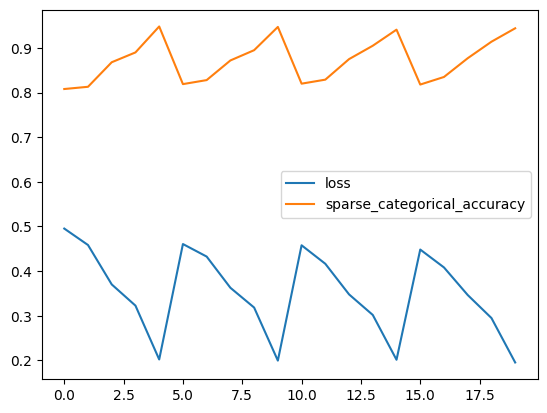

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 161ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.85      0.87      0.86       261
     neutral       0.73      0.75      0.74       251
         sad       0.77      0.73      0.75       251

    accuracy                           0.78       763
   macro avg       0.78      0.78      0.78       763
weighted avg       0.78      0.78      0.78       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 43ms/step - loss: 0.5623 - sparse_categorical_accuracy: 0.7851
test loss: 0.5622864365577698
test acc: 0.7850589752197266


#SGD with momentum WITHOUT DROPOUTS

In [ ]:
from tensorflow.keras.optimizers import SGD
custom_model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 9s 148ms/step - loss: 0.4390 - sparse_categorical_accuracy: 0.8300
Epoch 2/20
50/50 [==============================] - 11s 215ms/step - loss: 0.3747 - sparse_categorical_accuracy: 0.8460
Epoch 3/20
50/50 [==============================] - 7s 137ms/step - loss: 0.3310 - sparse_categorical_accuracy: 0.8840
Epoch 4/20
50/50 [==============================] - 9s 177ms/step - loss: 0.2880 - sparse_categorical_accuracy: 0.9060
Epoch 5/20
50/50 [==============================] - 7s 133ms/step - loss: 0.1945 - sparse_categorical_accuracy: 0.9461
Epoch 6/20
50/50 [==============================] - 10s 206ms/step - loss: 0.4141 - sparse_categorical_accuracy: 0.8310
Epoch 7/20
50/50 [==============================] - 17s 346ms/step - loss: 0.3529 - sparse_categorical_accuracy: 0.8650
Epoch 8/20
50/50 [==============================] - 13s 254ms/step - loss: 0.3036 - sparse_categorical_accuracy: 0.9020
Epoch 9/20
50/50 [==========================

<Axes: >

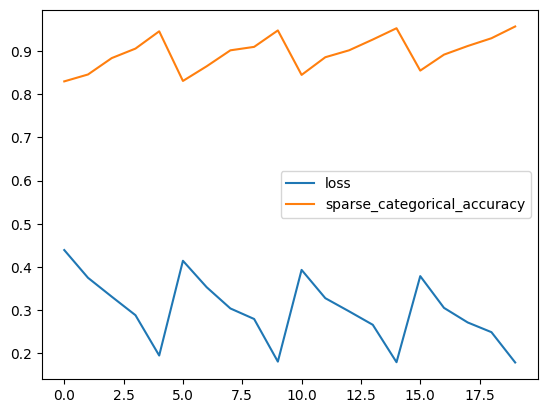

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 148ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.87      0.84      0.86       261
     neutral       0.74      0.76      0.75       251
         sad       0.76      0.77      0.76       251

    accuracy                           0.79       763
   macro avg       0.79      0.79      0.79       763
weighted avg       0.79      0.79      0.79       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 2s 61ms/step - loss: 0.5488 - sparse_categorical_accuracy: 0.7969
test loss: 0.5488372445106506
test acc: 0.7968544960021973


#ADAM WITHOUT DROPOUTS

In [ ]:
custom_model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

50/50 [==============================] - 8s 139ms/step - loss: 0.3636 - sparse_categorical_accuracy: 0.8670
Epoch 2/20
50/50 [==============================] - 9s 187ms/step - loss: 0.2897 - sparse_categorical_accuracy: 0.8990
Epoch 3/20
50/50 [==============================] - 11s 220ms/step - loss: 0.2606 - sparse_categorical_accuracy: 0.9120
Epoch 4/20
50/50 [==============================] - 7s 141ms/step - loss: 0.2474 - sparse_categorical_accuracy: 0.9240
Epoch 5/20
50/50 [==============================] - 9s 178ms/step - loss: 0.1769 - sparse_categorical_accuracy: 0.9491
Epoch 6/20
50/50 [==============================] - 7s 137ms/step - loss: 0.3033 - sparse_categorical_accuracy: 0.8930
Epoch 7/20
50/50 [==============================] - 9s 183ms/step - loss: 0.2298 - sparse_categorical_accuracy: 0.9280
Epoch 8/20
50/50 [==============================] - 7s 140ms/step - loss: 0.2212 - sparse_categorical_accuracy: 0.9350
Epoch 9/20
50/50 [==============================] - 9s 180

<Axes: >

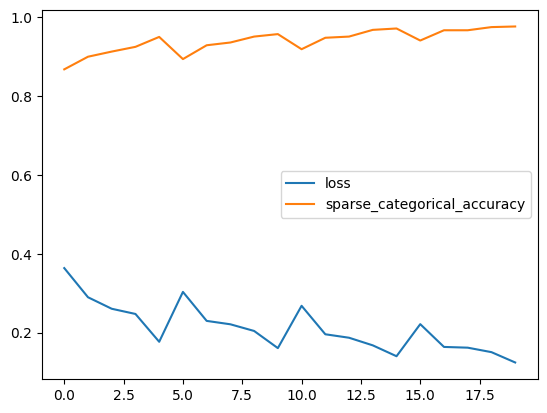

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 138ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.89      0.89      0.89       261
     neutral       0.80      0.80      0.80       251
         sad       0.82      0.81      0.81       251

    accuracy                           0.83       763
   macro avg       0.83      0.83      0.83       763
weighted avg       0.83      0.83      0.83       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 42ms/step - loss: 0.4740 - sparse_categorical_accuracy: 0.8375
test loss: 0.4739567041397095
test acc: 0.8374836444854736


#MODEL WITH DROPOUTS

In [ ]:
custom_model1= Sequential()

custom_model1.add(Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), activation='relu'))
custom_model1.add(Dropout(0.2))
custom_model1.add(MaxPooling2D(pool_size=(2, 2)))
custom_model1.add(BatchNormalization())

custom_model1.add(Conv2D(32, (3, 3), activation='relu'))
custom_model1.add(Dropout(0.2))
custom_model1.add(MaxPooling2D(pool_size=(2, 2)))
custom_model1.add(BatchNormalization())

custom_model1.add(Conv2D(32, (3, 3), activation='relu'))
custom_model1.add(Dropout(0.2))
custom_model1.add(MaxPooling2D(pool_size=(2, 2)))
custom_model1.add(BatchNormalization())

custom_model1.add(Flatten())
custom_model1.add(Dense(units=128, activation='relu'))
custom_model1.add(Dropout(0.2))
custom_model1.add(Dense(units=4, activation='softmax'))

#SGD WITH DROPOUTS

In [ ]:
custom_model1.compile(optimizer=SGD(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model1.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 11s 180ms/step - loss: 1.7083 - sparse_categorical_accuracy: 0.3170
Epoch 2/20
50/50 [==============================] - 11s 213ms/step - loss: 1.6179 - sparse_categorical_accuracy: 0.3210
Epoch 3/20
50/50 [==============================] - 10s 210ms/step - loss: 1.6252 - sparse_categorical_accuracy: 0.3370
Epoch 4/20
50/50 [==============================] - 9s 175ms/step - loss: 1.5826 - sparse_categorical_accuracy: 0.3060
Epoch 5/20
50/50 [==============================] - 11s 213ms/step - loss: 1.5069 - sparse_categorical_accuracy: 0.3388
Epoch 6/20
50/50 [==============================] - 11s 212ms/step - loss: 1.5273 - sparse_categorical_accuracy: 0.3250
Epoch 7/20
50/50 [==============================] - 9s 170ms/step - loss: 1.5032 - sparse_categorical_accuracy: 0.3330
Epoch 8/20
50/50 [==============================] - 11s 214ms/step - loss: 1.4447 - sparse_categorical_accuracy: 0.3430
Epoch 9/20
50/50 [========================

<Axes: >

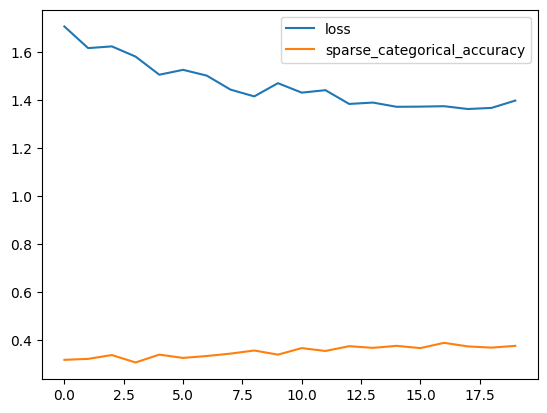

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model1.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 166ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     Unknown       0.00      0.00      0.00         0
       happy       0.45      0.23      0.31       261
     neutral       0.42      0.43      0.42       251
         sad       0.40      0.58      0.48       251

    accuracy                           0.41       763
   macro avg       0.32      0.31      0.30       763
weighted avg       0.42      0.41      0.40       763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 2s 79ms/step - loss: 0.4823 - sparse_categorical_accuracy: 0.8309
test loss: 0.4822823703289032
test acc: 0.8309305310249329


#ADAGRAD WITH DROPOUTS

In [ ]:
custom_model1.compile(optimizer=Adagrad(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model1.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 12s 216ms/step - loss: 1.3643 - sparse_categorical_accuracy: 0.3970
Epoch 2/20
50/50 [==============================] - 9s 172ms/step - loss: 1.3833 - sparse_categorical_accuracy: 0.3720
Epoch 3/20
50/50 [==============================] - 11s 215ms/step - loss: 1.3595 - sparse_categorical_accuracy: 0.3750
Epoch 4/20
50/50 [==============================] - 11s 218ms/step - loss: 1.3426 - sparse_categorical_accuracy: 0.4020
Epoch 5/20
50/50 [==============================] - 8s 168ms/step - loss: 1.3783 - sparse_categorical_accuracy: 0.3693
Epoch 6/20
50/50 [==============================] - 11s 214ms/step - loss: 1.3138 - sparse_categorical_accuracy: 0.3940
Epoch 7/20
50/50 [==============================] - 11s 215ms/step - loss: 1.3091 - sparse_categorical_accuracy: 0.3990
Epoch 8/20
50/50 [==============================] - 9s 174ms/step - loss: 1.2648 - sparse_categorical_accuracy: 0.4230
Epoch 9/20
50/50 [=========================

<Axes: >

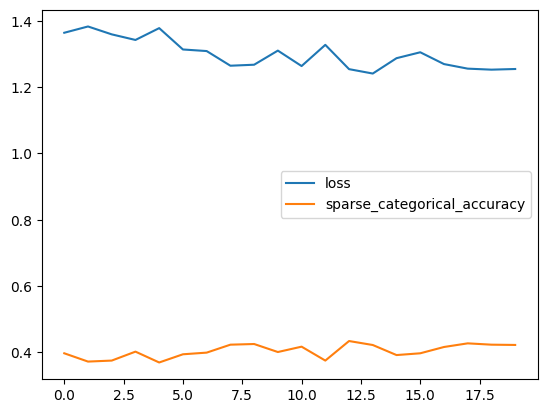

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model1.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 157ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.53      0.27      0.36       261
     neutral       0.40      0.46      0.43       251
         sad       0.41      0.56      0.48       251

    accuracy                           0.43       763
   macro avg       0.45      0.43      0.42       763
weighted avg       0.45      0.43      0.42       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 42ms/step - loss: 0.4812 - sparse_categorical_accuracy: 0.8349
test loss: 0.4812391698360443
test acc: 0.8348624110221863


#ADADELTA WITH DROPOUTS

In [ ]:
custom_model1.compile(optimizer=Adadelta(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model1.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 13s 216ms/step - loss: 1.2696 - sparse_categorical_accuracy: 0.4180
Epoch 2/20
50/50 [==============================] - 10s 189ms/step - loss: 1.3011 - sparse_categorical_accuracy: 0.3930
Epoch 3/20
50/50 [==============================] - 11s 220ms/step - loss: 1.2168 - sparse_categorical_accuracy: 0.4400
Epoch 4/20
50/50 [==============================] - 11s 213ms/step - loss: 1.2520 - sparse_categorical_accuracy: 0.4310
Epoch 5/20
50/50 [==============================] - 9s 175ms/step - loss: 1.2725 - sparse_categorical_accuracy: 0.4181
Epoch 6/20
50/50 [==============================] - 11s 216ms/step - loss: 1.2216 - sparse_categorical_accuracy: 0.4300
Epoch 7/20
50/50 [==============================] - 11s 213ms/step - loss: 1.2898 - sparse_categorical_accuracy: 0.4010
Epoch 8/20
50/50 [==============================] - 9s 172ms/step - loss: 1.2432 - sparse_categorical_accuracy: 0.4300
Epoch 9/20
50/50 [========================

<Axes: >

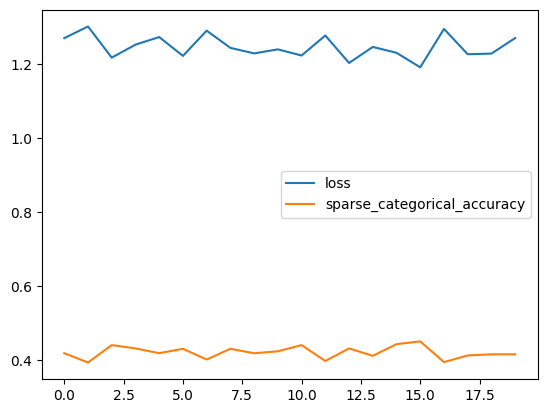

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model1.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 147ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.48      0.28      0.35       261
     neutral       0.42      0.45      0.43       251
         sad       0.43      0.59      0.50       251

    accuracy                           0.44       763
   macro avg       0.44      0.44      0.43       763
weighted avg       0.44      0.44      0.43       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 42ms/step - loss: 0.4831 - sparse_categorical_accuracy: 0.8375
test loss: 0.48308730125427246
test acc: 0.8374836444854736


#RMSPROP WITH DROPOUTS

In [ ]:
from keras.optimizers import RMSprop
custom_model1.compile(optimizer=RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model1.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 14s 263ms/step - loss: 1.4051 - sparse_categorical_accuracy: 0.4080
Epoch 2/20
50/50 [==============================] - 9s 177ms/step - loss: 1.2208 - sparse_categorical_accuracy: 0.4440
Epoch 3/20
50/50 [==============================] - 10s 204ms/step - loss: 1.1019 - sparse_categorical_accuracy: 0.5120
Epoch 4/20
50/50 [==============================] - 11s 213ms/step - loss: 1.1088 - sparse_categorical_accuracy: 0.5050
Epoch 5/20
50/50 [==============================] - 9s 176ms/step - loss: 1.0575 - sparse_categorical_accuracy: 0.5025
Epoch 6/20
50/50 [==============================] - 10s 204ms/step - loss: 0.9598 - sparse_categorical_accuracy: 0.5810
Epoch 7/20
50/50 [==============================] - 11s 213ms/step - loss: 0.9348 - sparse_categorical_accuracy: 0.5600
Epoch 8/20
50/50 [==============================] - 9s 190ms/step - loss: 0.8854 - sparse_categorical_accuracy: 0.5930
Epoch 9/20
50/50 [=========================

<Axes: >

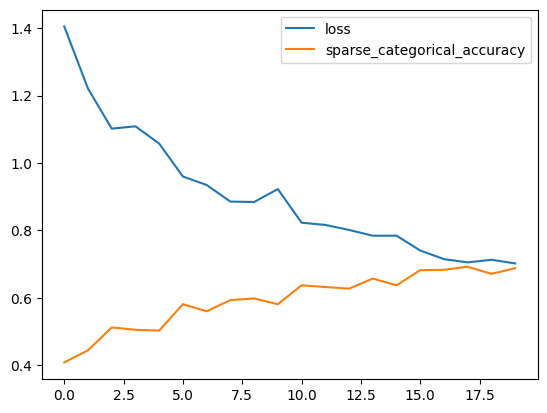

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model1.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 149ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.73      0.80      0.77       261
     neutral       0.79      0.31      0.45       251
         sad       0.53      0.80      0.64       251

    accuracy                           0.64       763
   macro avg       0.68      0.64      0.62       763
weighted avg       0.68      0.64      0.62       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 43ms/step - loss: 0.4798 - sparse_categorical_accuracy: 0.8375
test loss: 0.47981128096580505
test acc: 0.8374836444854736


#SGD MOMENTUM WITH DROPOUTS

In [ ]:
custom_model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model1.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 12s 240ms/step - loss: 0.6388 - sparse_categorical_accuracy: 0.7310
Epoch 2/20
50/50 [==============================] - 12s 233ms/step - loss: 0.6486 - sparse_categorical_accuracy: 0.7220
Epoch 3/20
50/50 [==============================] - 9s 171ms/step - loss: 0.6099 - sparse_categorical_accuracy: 0.7500
Epoch 4/20
50/50 [==============================] - 11s 214ms/step - loss: 0.6056 - sparse_categorical_accuracy: 0.7530
Epoch 5/20
50/50 [==============================] - 11s 214ms/step - loss: 0.6139 - sparse_categorical_accuracy: 0.7294
Epoch 6/20
50/50 [==============================] - 9s 172ms/step - loss: 0.5912 - sparse_categorical_accuracy: 0.7540
Epoch 7/20
50/50 [==============================] - 11s 210ms/step - loss: 0.5340 - sparse_categorical_accuracy: 0.7740
Epoch 8/20
50/50 [==============================] - 11s 213ms/step - loss: 0.5355 - sparse_categorical_accuracy: 0.7710
Epoch 9/20
50/50 [========================

<Axes: >

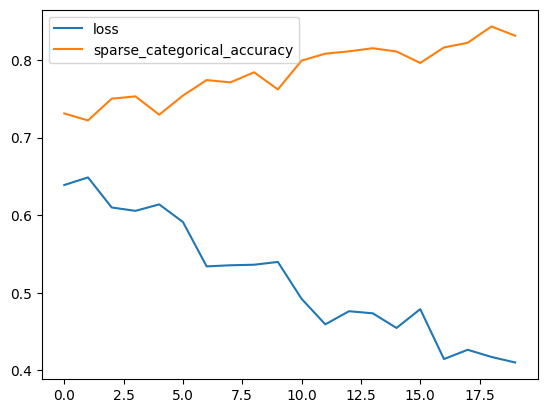

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model1.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 59ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.79      0.86      0.83       261
     neutral       0.83      0.54      0.65       251
         sad       0.64      0.82      0.72       251

    accuracy                           0.74       763
   macro avg       0.76      0.74      0.73       763
weighted avg       0.76      0.74      0.73       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 2s 76ms/step - loss: 0.4681 - sparse_categorical_accuracy: 0.8388
test loss: 0.4680757224559784
test acc: 0.8387942314147949


#ADAM WITH DROPOUTS

In [ ]:
custom_model1.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = custom_model1.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 11s 179ms/step - loss: 0.4003 - sparse_categorical_accuracy: 0.8330
Epoch 2/20
50/50 [==============================] - 12s 232ms/step - loss: 0.3688 - sparse_categorical_accuracy: 0.8560
Epoch 3/20
50/50 [==============================] - 10s 206ms/step - loss: 0.3140 - sparse_categorical_accuracy: 0.8850
Epoch 4/20
50/50 [==============================] - 10s 207ms/step - loss: 0.3117 - sparse_categorical_accuracy: 0.8880
Epoch 5/20
50/50 [==============================] - 9s 177ms/step - loss: 0.2622 - sparse_categorical_accuracy: 0.9156
Epoch 6/20
50/50 [==============================] - 10s 198ms/step - loss: 0.3539 - sparse_categorical_accuracy: 0.8610
Epoch 7/20
50/50 [==============================] - 10s 207ms/step - loss: 0.3047 - sparse_categorical_accuracy: 0.8720
Epoch 8/20
50/50 [==============================] - 10s 208ms/step - loss: 0.2773 - sparse_categorical_accuracy: 0.8980
Epoch 9/20
50/50 [=======================

<Axes: >

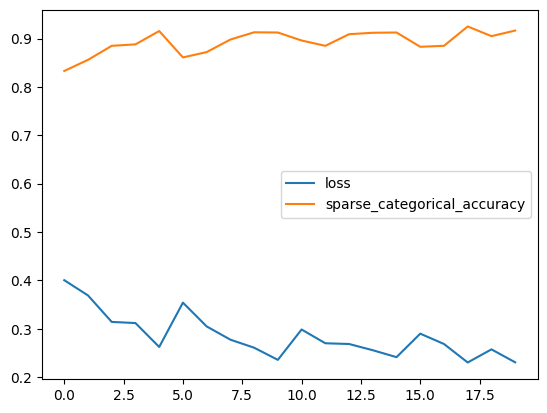

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model1.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 150ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.89      0.90      0.89       261
     neutral       0.77      0.79      0.78       251
         sad       0.79      0.76      0.77       251

    accuracy                           0.82       763
   macro avg       0.82      0.82      0.82       763
weighted avg       0.82      0.82      0.82       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 43ms/step - loss: 0.4721 - sparse_categorical_accuracy: 0.8349
test loss: 0.4720979332923889
test acc: 0.8348624110221863


#resnet without dropouts

In [ ]:
from keras.applications import ResNet50
resnet = ResNet50(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
resnet.trainable = False
model_resnet = Sequential()
model_resnet.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model_resnet.add(resnet)
model_resnet.add(Flatten())
model_resnet.add(Dense(128, activation='relu'))
model_resnet.add(Dense(len(unique_labels), activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model_resnet.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model_resnet.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 24s 398ms/step - loss: 1.1189 - sparse_categorical_accuracy: 0.3380
Epoch 2/20
50/50 [==============================] - 19s 370ms/step - loss: 1.0903 - sparse_categorical_accuracy: 0.3980
Epoch 3/20
50/50 [==============================] - 19s 374ms/step - loss: 1.1028 - sparse_categorical_accuracy: 0.3530
Epoch 4/20
50/50 [==============================] - 18s 365ms/step - loss: 1.0905 - sparse_categorical_accuracy: 0.3800
Epoch 5/20
50/50 [==============================] - 18s 352ms/step - loss: 1.0904 - sparse_categorical_accuracy: 0.3693
Epoch 6/20
50/50 [==============================] - 18s 362ms/step - loss: 1.0819 - sparse_categorical_accuracy: 0.3790
Epoch 7/20
50/50 [==============================] - 19s 380ms/step - loss: 1.0724 - sparse_categorical_accuracy: 0.4380
Epoch 8/20
50/50 [==============================] - 18s 357ms/step - loss: 1.0880 - sparse_categorical_accuracy: 0.3880
Epoch 9/20
50/50 [======================

<Axes: >

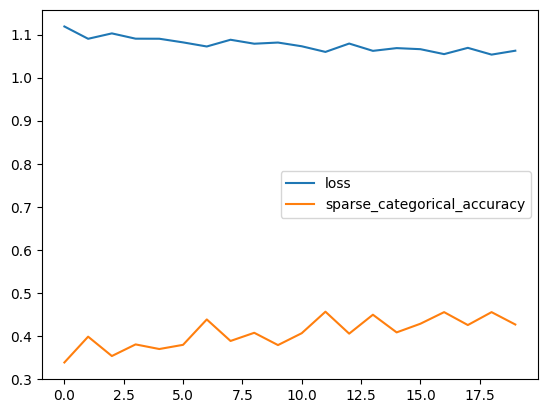

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 140ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.90      0.89      0.89       261
     neutral       0.80      0.82      0.81       251
         sad       0.81      0.80      0.81       251

    accuracy                           0.84       763
   macro avg       0.84      0.84      0.84       763
weighted avg       0.84      0.84      0.84       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 2s 77ms/step - loss: 0.4832 - sparse_categorical_accuracy: 0.8388
test loss: 0.48317834734916687
test acc: 0.8387942314147949


#resnet with dropouts

In [ ]:
from keras.applications import VGG16

base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model_resnet1 = Sequential()
model_resnet1.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model_resnet1.add(base_model)
model_resnet1.add(Flatten())
model_resnet1.add(Dropout(0.3))
model_resnet1.add(Dense(128, activation='relu'))
model_resnet1.add(Dropout(0.2))
model_resnet1.add(Dense(len(unique_labels), activation='softmax'))
model_resnet1.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               262272    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                       

In [ ]:
model_resnet1.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model_resnet1.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 75s 1s/step - loss: 1.1369 - sparse_categorical_accuracy: 0.3900
Epoch 2/20
50/50 [==============================] - 72s 1s/step - loss: 1.0420 - sparse_categorical_accuracy: 0.4740
Epoch 3/20
50/50 [==============================] - 71s 1s/step - loss: 1.0104 - sparse_categorical_accuracy: 0.4930
Epoch 4/20
50/50 [==============================] - 73s 1s/step - loss: 0.9691 - sparse_categorical_accuracy: 0.5400
Epoch 5/20
50/50 [==============================] - 71s 1s/step - loss: 0.9123 - sparse_categorical_accuracy: 0.5697
Epoch 6/20
50/50 [==============================] - 74s 1s/step - loss: 0.8942 - sparse_categorical_accuracy: 0.5900
Epoch 7/20
50/50 [==============================] - 73s 1s/step - loss: 0.8532 - sparse_categorical_accuracy: 0.5970
Epoch 8/20
50/50 [==============================] - 72s 1s/step - loss: 0.8309 - sparse_categorical_accuracy: 0.6060
Epoch 9/20
50/50 [==============================] - 72s 1s/step 

<Axes: >

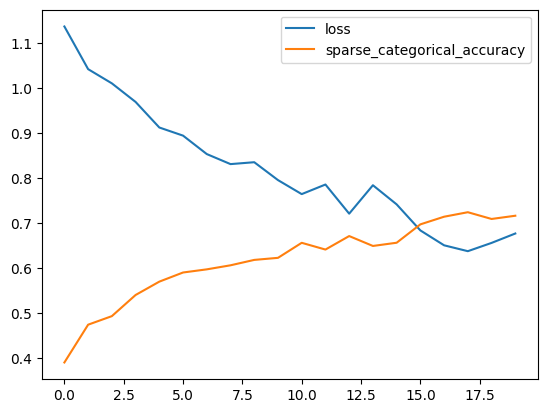

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 56ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.88      0.89      0.89       261
     neutral       0.80      0.81      0.80       251
         sad       0.81      0.79      0.80       251

    accuracy                           0.83       763
   macro avg       0.83      0.83      0.83       763
weighted avg       0.83      0.83      0.83       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 41ms/step - loss: 0.4690 - sparse_categorical_accuracy: 0.8401
test loss: 0.4690288305282593
test acc: 0.840104877948761


#ALEXNET WITHOUT DROPOUTS

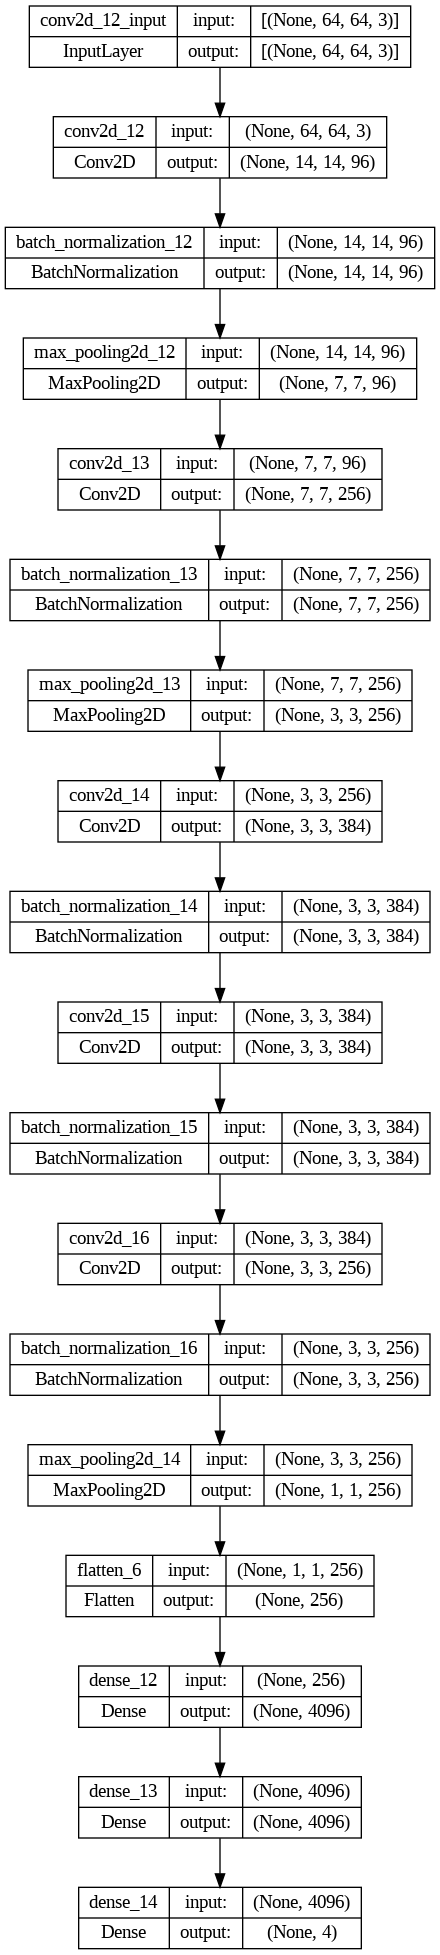

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dense(4,activation='softmax') ])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(datagen(train_paths, train_labels, batch_size=20, epochs=10),epochs=10, steps_per_epoch=150)

Epoch 1/10
150/150 [==============================] - 87s 568ms/step - loss: 1.1923 - sparse_categorical_accuracy: 0.3860
Epoch 2/10
150/150 [==============================] - 84s 561ms/step - loss: 1.0841 - sparse_categorical_accuracy: 0.4237
Epoch 3/10
150/150 [==============================] - 84s 560ms/step - loss: 1.0283 - sparse_categorical_accuracy: 0.4837
Epoch 4/10
150/150 [==============================] - 86s 571ms/step - loss: 0.9643 - sparse_categorical_accuracy: 0.5220
Epoch 5/10
150/150 [==============================] - 84s 560ms/step - loss: 0.9031 - sparse_categorical_accuracy: 0.5662
Epoch 6/10
150/150 [==============================] - 86s 571ms/step - loss: 0.8664 - sparse_categorical_accuracy: 0.5857
Epoch 7/10
150/150 [==============================] - 84s 563ms/step - loss: 0.8009 - sparse_categorical_accuracy: 0.6138
Epoch 8/10
150/150 [==============================] - 86s 573ms/step - loss: 0.7734 - sparse_categorical_accuracy: 0.6447
Epoch 9/10
150/150 [====

<Axes: >

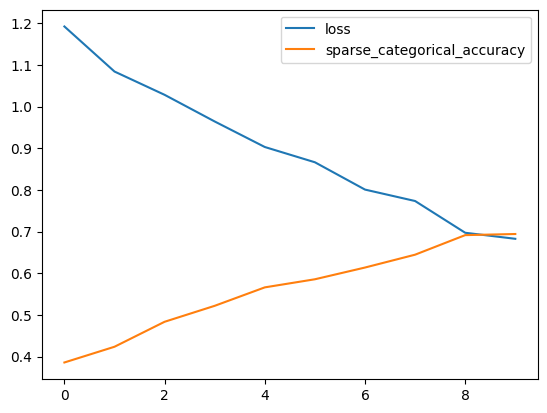

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 55ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.88      0.88      0.88       261
     neutral       0.80      0.81      0.81       251
         sad       0.81      0.80      0.81       251

    accuracy                           0.83       763
   macro avg       0.83      0.83      0.83       763
weighted avg       0.83      0.83      0.83       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 42ms/step - loss: 0.4868 - sparse_categorical_accuracy: 0.8309
test loss: 0.48680105805397034
test acc: 0.8309305310249329


#ALEXNET WITH DROPOUTS

In [ ]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),  # Dropout layer added
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),  # Dropout layer added
    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.3),  # Dropout layer added
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.3),  # Dropout layer added
    keras.layers.Dense(4, activation='softmax')
])
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 14, 14, 96)        34944     
                                                                 
 batch_normalization_17 (Bat  (None, 14, 14, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 96)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 96)          0         
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 256)         614656    
                                                                 
 batch_normalization_18 (Bat  (None, 7, 7, 256)       

In [ ]:
model1.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 30s 607ms/step - loss: 0.6341 - sparse_categorical_accuracy: 0.7270
Epoch 2/20
50/50 [==============================] - 28s 562ms/step - loss: 0.5517 - sparse_categorical_accuracy: 0.7540
Epoch 3/20
50/50 [==============================] - 29s 566ms/step - loss: 0.6306 - sparse_categorical_accuracy: 0.7140
Epoch 4/20
50/50 [==============================] - 28s 564ms/step - loss: 0.6119 - sparse_categorical_accuracy: 0.7310
Epoch 5/20
50/50 [==============================] - 28s 562ms/step - loss: 0.5190 - sparse_categorical_accuracy: 0.7711
Epoch 6/20
50/50 [==============================] - 28s 565ms/step - loss: 0.5258 - sparse_categorical_accuracy: 0.7940
Epoch 7/20
50/50 [==============================] - 28s 562ms/step - loss: 0.4063 - sparse_categorical_accuracy: 0.8350
Epoch 8/20
50/50 [==============================] - 30s 600ms/step - loss: 0.5754 - sparse_categorical_accuracy: 0.7450
Epoch 9/20
50/50 [======================

<Axes: >

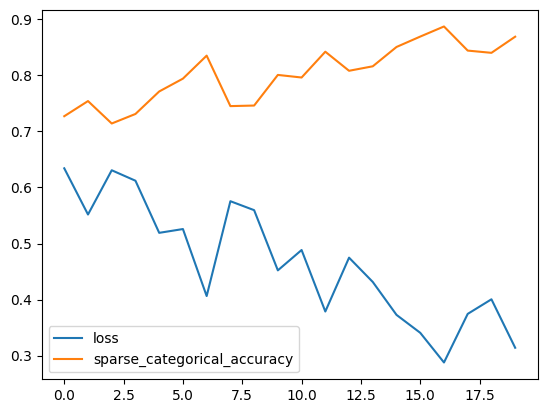

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 239ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.82      0.69      0.75       261
     neutral       0.70      0.57      0.63       251
         sad       0.57      0.76      0.65       251

    accuracy                           0.67       763
   macro avg       0.69      0.67      0.68       763
weighted avg       0.70      0.67      0.68       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 43ms/step - loss: 0.4812 - sparse_categorical_accuracy: 0.8362
test loss: 0.4811844229698181
test acc: 0.8361729979515076


#VGG16 WITHOUT DROPOUTS

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

# Set the image size and number of classes
IMAGE_SIZE = 64
NUM_CLASSES = len(unique_labels)

# Create the ResNet50 model
base_model = ResNet50(
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the layers of the base model
base_model.trainable = False

# Create the model architecture
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create an image data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Define the training data generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=20,
    class_mode='sparse'
)

# Define the validation data generator
valid_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=20,
    class_mode='sparse'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)

94765736/94765736 [==============================] - 1s 0us/step
Found 4983 images belonging to 3 classes.
Found 763 images belonging to 3 classes.
Epoch 1/20
250/250 [==============================] - 1346s 5s/step - loss: 1.1220 - accuracy: 0.3632 - val_loss: 1.0980 - val_accuracy: 0.3290
Epoch 2/20
250/250 [==============================] - 66s 263ms/step - loss: 1.0942 - accuracy: 0.3689 - val_loss: 1.0887 - val_accuracy: 0.3526
Epoch 3/20
250/250 [==============================] - 64s 256ms/step - loss: 1.0935 - accuracy: 0.3711 - val_loss: 1.0853 - val_accuracy: 0.4115
Epoch 4/20
250/250 [==============================] - 66s 263ms/step - loss: 1.0849 - accuracy: 0.3965 - val_loss: 1.0747 - val_accuracy: 0.4194
Epoch 5/20
250/250 [==============================] - 66s 263ms/step - loss: 1.0866 - accuracy: 0.3891 - val_loss: 1.0768 - val_accuracy: 0.4351
Epoch 6/20
250/250 [==============================] - 65s 260ms/step - loss: 1.0886 - accuracy: 0.3797 - val_loss: 1.0938 - val_

<Axes: >

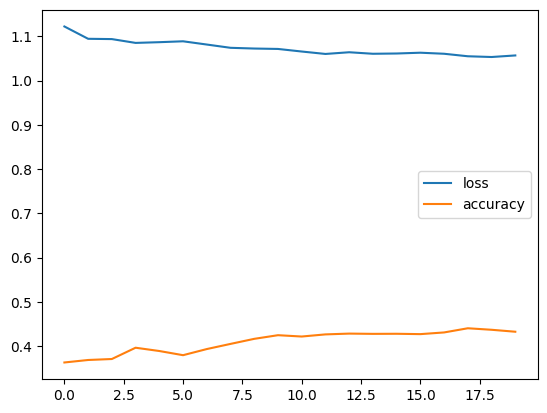

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'accuracy']].plot()

In [ ]:
unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels
def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)
unique_labels = ['happy', 'neutral', 'sad']

def decode_label(labels):
    decoded = []
    for x in labels:
        if x >= 0 and x < len(unique_labels):
            decoded.append(unique_labels[x])
        else:
            decoded.append('Unknown')
    return np.array(decoded)

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []

# Assuming you have a generator function called `datagen` that yields batches of test data
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)





1/1 [==============================] - 1s 1s/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       happy       0.57      0.41      0.47       261
     neutral       0.43      0.53      0.47       251
         sad       0.44      0.47      0.45       251

    accuracy                           0.47       763
   macro avg       0.48      0.47      0.47       763
weighted avg       0.48      0.47      0.47       763



In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 26ms/step - loss: 1.3554 - sparse_categorical_accuracy: 0.3630
test loss: 1.3553745746612549
test acc: 0.36304062604904175


#VGG16 with dropouts

In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with pre-trained weights
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Make the last 3 layers of the base model trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# Create a new sequential model
model2 = Sequential()

# Add the input layer and the base model to the new model
model2.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model2.add(base_model)

# Add dropout layer after the base model
model2.add(Dropout(0.5))

# Flatten the output of the base model
model2.add(Flatten())

# Add a fully connected layer with dropout
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

# Add the output layer
model2.add(Dense(len(unique_labels), activation='softmax'))

# Print the summary of the model
model2.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dropout_2 (Dropout)         (None, 2, 2, 512)         0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                       

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model2.fit(datagen(train_paths, train_labels, batch_size=20, epochs=20),epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 50s 984ms/step - loss: 1.2860 - sparse_categorical_accuracy: 0.3500
Epoch 2/20
50/50 [==============================] - 47s 944ms/step - loss: 1.1145 - sparse_categorical_accuracy: 0.3680
Epoch 3/20
50/50 [==============================] - 47s 944ms/step - loss: 1.0792 - sparse_categorical_accuracy: 0.4070
Epoch 4/20
50/50 [==============================] - 46s 919ms/step - loss: 1.0644 - sparse_categorical_accuracy: 0.4160
Epoch 5/20
50/50 [==============================] - 46s 923ms/step - loss: 1.0570 - sparse_categorical_accuracy: 0.4507
Epoch 6/20
50/50 [==============================] - 47s 938ms/step - loss: 1.0210 - sparse_categorical_accuracy: 0.4590
Epoch 7/20
50/50 [==============================] - 47s 940ms/step - loss: 0.9882 - sparse_categorical_accuracy: 0.5100
Epoch 8/20
50/50 [==============================] - 46s 918ms/step - loss: 0.9616 - sparse_categorical_accuracy: 0.5380
Epoch 9/20
50/50 [======================

<Axes: >

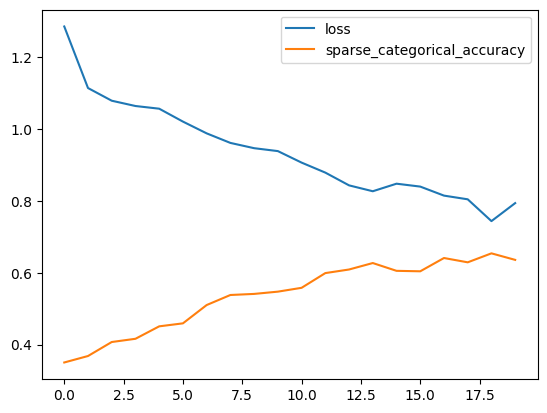

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'sparse_categorical_accuracy']].plot()

In [ ]:
batch_size = 32
steps = int(len(test_paths) / batch_size)
y_pred = []
y_true = []
for x, y in datagen(test_paths, test_labels, batch_size=batch_size, epochs=1):
    pred = custom_model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

1/1 [==============================] - 0s 37ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     Unknown       0.00      0.00      0.00         0
       happy       0.41      0.42      0.41       261
     neutral       0.32      0.37      0.34       251
         sad       0.35      0.27      0.31       251

    accuracy                           0.35       763
   macro avg       0.27      0.26      0.27       763
weighted avg       0.36      0.35      0.36       763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_data = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

# Evaluate the model
test_loss, test_accuracy = custom_model.evaluate(test_data, test_labels_encoded)
print(f'test loss: {test_loss}')
print(f'test acc: {test_accuracy}')

24/24 [==============================] - 1s 26ms/step - loss: 1.3427 - sparse_categorical_accuracy: 0.3879
test loss: 1.3427400588989258
test acc: 0.3879423439502716
